In [19]:
import timm
import torch
from fastai.vision.all import *
import matplotlib.pyplot as plt

## Download Data

In [15]:
# Download and extract the dataset
path = untar_data(URLs.PETS)

# Check the folder structure
path.ls()
pets_image_files = get_image_files(path/"images")

In [ ]:
path = untar_data(URLs.IMAGENETTE)

# Check the folder structure
path.ls()
imagenette_files = get_image_files(path/"images")

(#3) [Path('/root/.fastai/data/imagenette2/train'),Path('/root/.fastai/data/imagenette2/val'),Path('/root/.fastai/data/imagenette2/noisy_imagenette.csv')]

## Models

In [ ]:
timm.list_models('resnet*', pretrained=True)

['resnet10t.c3_in1k',
 'resnet14t.c3_in1k',
 'resnet18.a1_in1k',
 'resnet18.a2_in1k',
 'resnet18.a3_in1k',
 'resnet18.fb_ssl_yfcc100m_ft_in1k',
 'resnet18.fb_swsl_ig1b_ft_in1k',
 'resnet18.gluon_in1k',
 'resnet18.tv_in1k',
 'resnet18d.ra2_in1k',
 'resnet18d.ra4_e3600_r224_in1k',
 'resnet26.bt_in1k',
 'resnet26d.bt_in1k',
 'resnet26t.ra2_in1k',
 'resnet32ts.ra2_in1k',
 'resnet33ts.ra2_in1k',
 'resnet34.a1_in1k',
 'resnet34.a2_in1k',
 'resnet34.a3_in1k',
 'resnet34.bt_in1k',
 'resnet34.gluon_in1k',
 'resnet34.ra4_e3600_r224_in1k',
 'resnet34.tv_in1k',
 'resnet34d.ra2_in1k',
 'resnet50.a1_in1k',
 'resnet50.a1h_in1k',
 'resnet50.a2_in1k',
 'resnet50.a3_in1k',
 'resnet50.am_in1k',
 'resnet50.b1k_in1k',
 'resnet50.b2k_in1k',
 'resnet50.bt_in1k',
 'resnet50.c1_in1k',
 'resnet50.c2_in1k',
 'resnet50.d_in1k',
 'resnet50.fb_ssl_yfcc100m_ft_in1k',
 'resnet50.fb_swsl_ig1b_ft_in1k',
 'resnet50.gluon_in1k',
 'resnet50.ra_in1k',
 'resnet50.ram_in1k',
 'resnet50.tv2_in1k',
 'resnet50.tv_in1k',
 'resne

### General Usage

In [ ]:
pets_image_paths = list([Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')])
pets_image_paths

[Path('/root/.fastai/data/oxford-iiit-pet/annotations'),
 Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
model = timm.create_model('resnet50d', pretrained=True)
model

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/103M [00:00<?, ?B/s]

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Co

In [ ]:
model.default_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth',
 'hf_hub_id': 'timm/resnet50d.ra2_in1k',
 'architecture': 'resnet50d',
 'tag': 'ra2_in1k',
 'custom_load': False,
 'input_size': (3, 224, 224),
 'test_input_size': (3, 288, 288),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.875,
 'test_crop_pct': 0.95,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'first_conv': 'conv1.0',
 'classifier': 'fc',
 'origin_url': 'https://github.com/huggingface/pytorch-image-models'}

In [ ]:
m = timm.create_model('resnet50d', pretrained=True, in_chans=1)

# single channel image
x = torch.randn(1, 1, 224, 224)

m(x).shape

torch.Size([1, 1000])

### Customizing models

In [ ]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
model.get_classifier()

Linear(in_features=2048, out_features=1000, bias=True)

If we would like to avoid creating the last layer completely, we can set the number of classes equal to 0, which will create a model with the identity function as the final layer; this can be useful for inspecting the output of penultimate layer.

In [ ]:
timm.create_model('resnet50d', pretrained=True, num_classes=0).get_classifier()

### Global Pooling options
- avg: Average pooling
- max: Max pooling
- avgmax: the sum of average and max pooling, re-scaled by 0.5
- catavgmax: a concatenation of the outputs of average and max pooling along feature dimension. Note that this will double the feature dimension.
- '': No pooling is used, the pooling layer is replaced by an Identity operation

In [3]:
pool_types = ['avg', 'max', 'avgmax', 'catavgmax', '']

for pool in pool_types:
    model = timm.create_model('resnet50d', pretrained=True, num_classes=0, global_pool=pool)
    model.eval()
    feature_output = model(torch.randn(1, 3, 224, 224))
    print(feature_output.shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/103M [00:00<?, ?B/s]

torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 2048])
torch.Size([1, 4096])
torch.Size([1, 2048, 7, 7])


### Modifying an existing model

In [4]:
m = timm.create_model('resnet50d', pretrained=True)

print(f'Original pooling: {m.global_pool}')
print(f'Original classifier: {m.get_classifier()}')
print('--------------------')

m.reset_classifier(10, 'max')

print(f'Modified pooling: {m.global_pool}')
print(f'Modified classifier: {m.get_classifier()}')

Original pooling: SelectAdaptivePool2d(pool_type=avg, flatten=Flatten(start_dim=1, end_dim=-1))
Original classifier: Linear(in_features=2048, out_features=1000, bias=True)
--------------------
Modified pooling: SelectAdaptivePool2d(pool_type=max, flatten=Flatten(start_dim=1, end_dim=-1))
Modified classifier: Linear(in_features=2048, out_features=10, bias=True)


##### Creating a new classification head

In [5]:
model = timm.create_model('resnet50d', pretrained=True, num_classes=10, global_pool='catavgmax')

In [6]:
num_in_features = model.get_classifier().in_features
num_in_features

4096

In [7]:
from torch import nn
model.fc = nn.Sequential(
    nn.BatchNorm1d(num_in_features),
    nn.Linear(in_features=num_in_features, out_features=512, bias=False),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.4),
    nn.Linear(in_features=512, out_features=10, bias=False))

In [8]:
model.eval()
model(torch.randn(1, 3, 224, 224)).shape

torch.Size([1, 10])

## Feature Extraction

In [9]:
from PIL import Image
import numpy as np

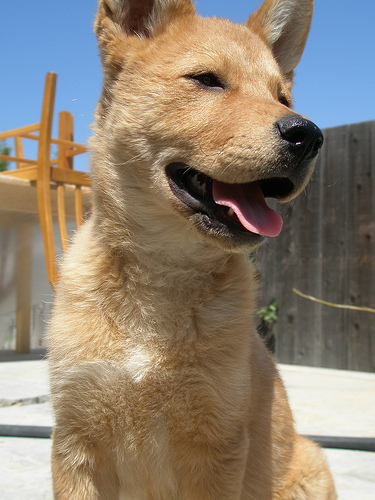

In [16]:
# Pick the first image
image = Image.open(pets_image_files[1])
image

In [17]:
image = torch.as_tensor(np.array(image, dtype=np.float32)).transpose(2, 0)[None]

In [18]:
model = timm.create_model('resnet50d', pretrained=True)
model.default_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth',
 'hf_hub_id': 'timm/resnet50d.ra2_in1k',
 'architecture': 'resnet50d',
 'tag': 'ra2_in1k',
 'custom_load': False,
 'input_size': (3, 224, 224),
 'test_input_size': (3, 288, 288),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.875,
 'test_crop_pct': 0.95,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'first_conv': 'conv1.0',
 'classifier': 'fc',
 'origin_url': 'https://github.com/huggingface/pytorch-image-models'}

use the forward_features method to bypass the global pooling and classification layers.

In [20]:
def visualise_feature_output(t):
    plt.imshow(feature_output[0].transpose(0, 2).sum(-1).detach().numpy())
    plt.show()

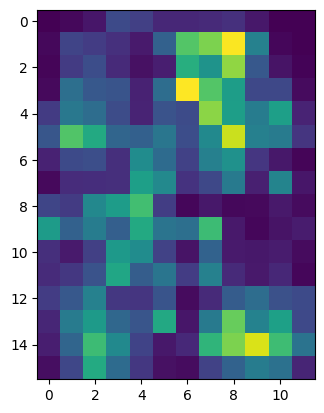

In [21]:
feature_output = model.forward_features(image)
visualise_feature_output(feature_output)

### Multiple feature outputs

timm also provides functionality which enables us to use models as feature backbones that output feature maps for selected levels.

In [23]:
model = timm.create_model('resnet50d', pretrained=True, features_only=True)
print(model.feature_info.module_name())
print(model.feature_info.reduction())
print(model.feature_info.channels())

['act1', 'layer1', 'layer2', 'layer3', 'layer4']
[2, 4, 8, 16, 32]
[64, 256, 512, 1024, 2048]


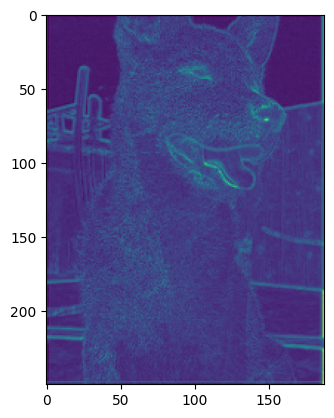

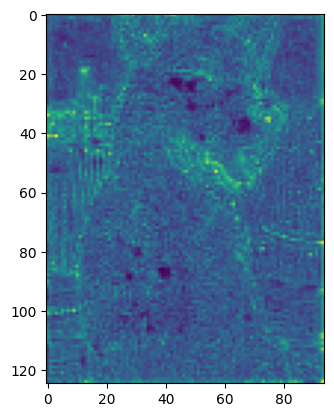

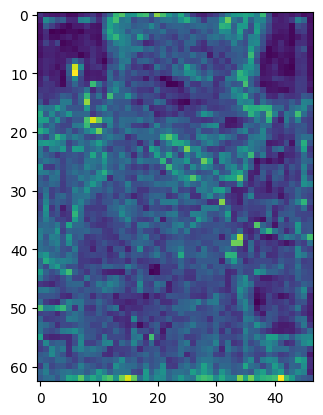

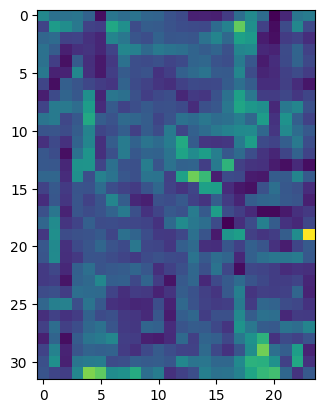

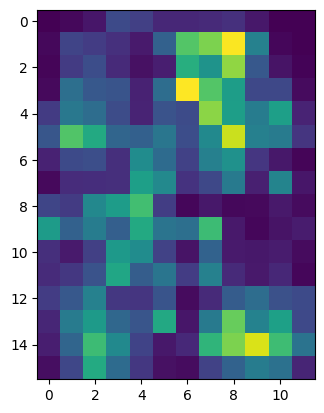

In [24]:
out = model(image)
for o in out:
    plt.imshow(o[0].transpose(0, 2).sum(-1).detach().numpy())
    plt.show()

### Using FX
TorchVision recently released a new utility called FX, which makes it easier to access intermediate transformations of an input during the forward pass of a PyTorch Module. This is done by symbolically tracing the forward method to produce a graph where each node represents a single operation. As nodes are given human-readable names, it is easy specify exactly which nodes we want to access. FX is described in more detail in the docs and in this blog post.

Note: At the time of writing, dynamic control flow can’t yet be represented in terms of a static graph when using FX.

As almost all models in timm are symbolically traceable, we can use FX to manipulate these. Let's explore how we can use FX to extract features from timm models.

In [25]:
from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

In [26]:
model = timm.create_model('resnet50d', pretrained=True, exportable=True)
nodes, _ = get_graph_node_names(model)

nodes[1:5]

['conv1.0', 'conv1.1', 'conv1.2', 'conv1.3']

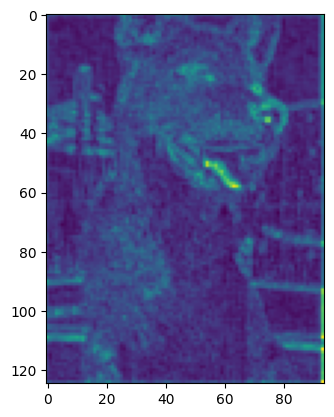

In [27]:
features = {'layer1.0.act2': 'out'}
feature_extractor = create_feature_extractor(model, return_nodes=features)

out = feature_extractor(image)
plt.imshow(out['out'][0].transpose(0, 2).sum(-1).detach().numpy())

### Exporting to different formats
https://gist.github.com/Chris-hughes10/a9e5ec2cd7e7736c651bf89b5484b4a9

- Exporting to TorchScript
- Exporting to ONNX